In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import sweetviz as sv
# from autoviz.AutoViz_Class import AutoViz_Class
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.linear_model import Lasso

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

# <font  color="bluelight"><strong>Load the Data

In [ ]:
wild_blueberry_data = pd.read_csv("/content/drive/MyDrive/miss_aq/class1/Project_1_wildBlueberry/WildBlueberryPollinationSimulationData.csv")


# <font color="grayblue">***preprocessing!*** </font>

In [ ]:
wild_blueberry_data.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


## <font color="maganta">Check the columns name</font>

In [ ]:
wild_blueberry_data.columns

Index(['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [ ]:
wild_blueberry_data.describe()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,388.000000,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,224.444871,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,194.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,388.000000,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,582.000000,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [ ]:
wild_blueberry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

# <font color="redblue"><stong>EDA AutoViz and sweetviz

In [ ]:
#AV = AutoViz_Class()

In [ ]:
#%matplotlib INLINE
#wild_Data = AV.AutoViz("/content/drive/MyDrive/miss_aq/class1/Project_1_wildBlueberry/WildBlueberryPollinationSimulationData.csv")

In [ ]:
#wild_data_report = sv.analyze(wild_blueberry_data)

#wild_data_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<font color="Yellow">Saved the Dataset in another variable</font>

In [ ]:
blueberryWild_data = wild_blueberry_data

# <font color="red"><strong>Removed this column from blueberryWild_data</font><br>

> Indented block


    Row#

In [ ]:
blueberryWild_data = blueberryWild_data.drop('Row#', axis=1)

In [ ]:
blueberryWild_data.describe()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


<font color="bluegray"><strong>Check the outliers

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


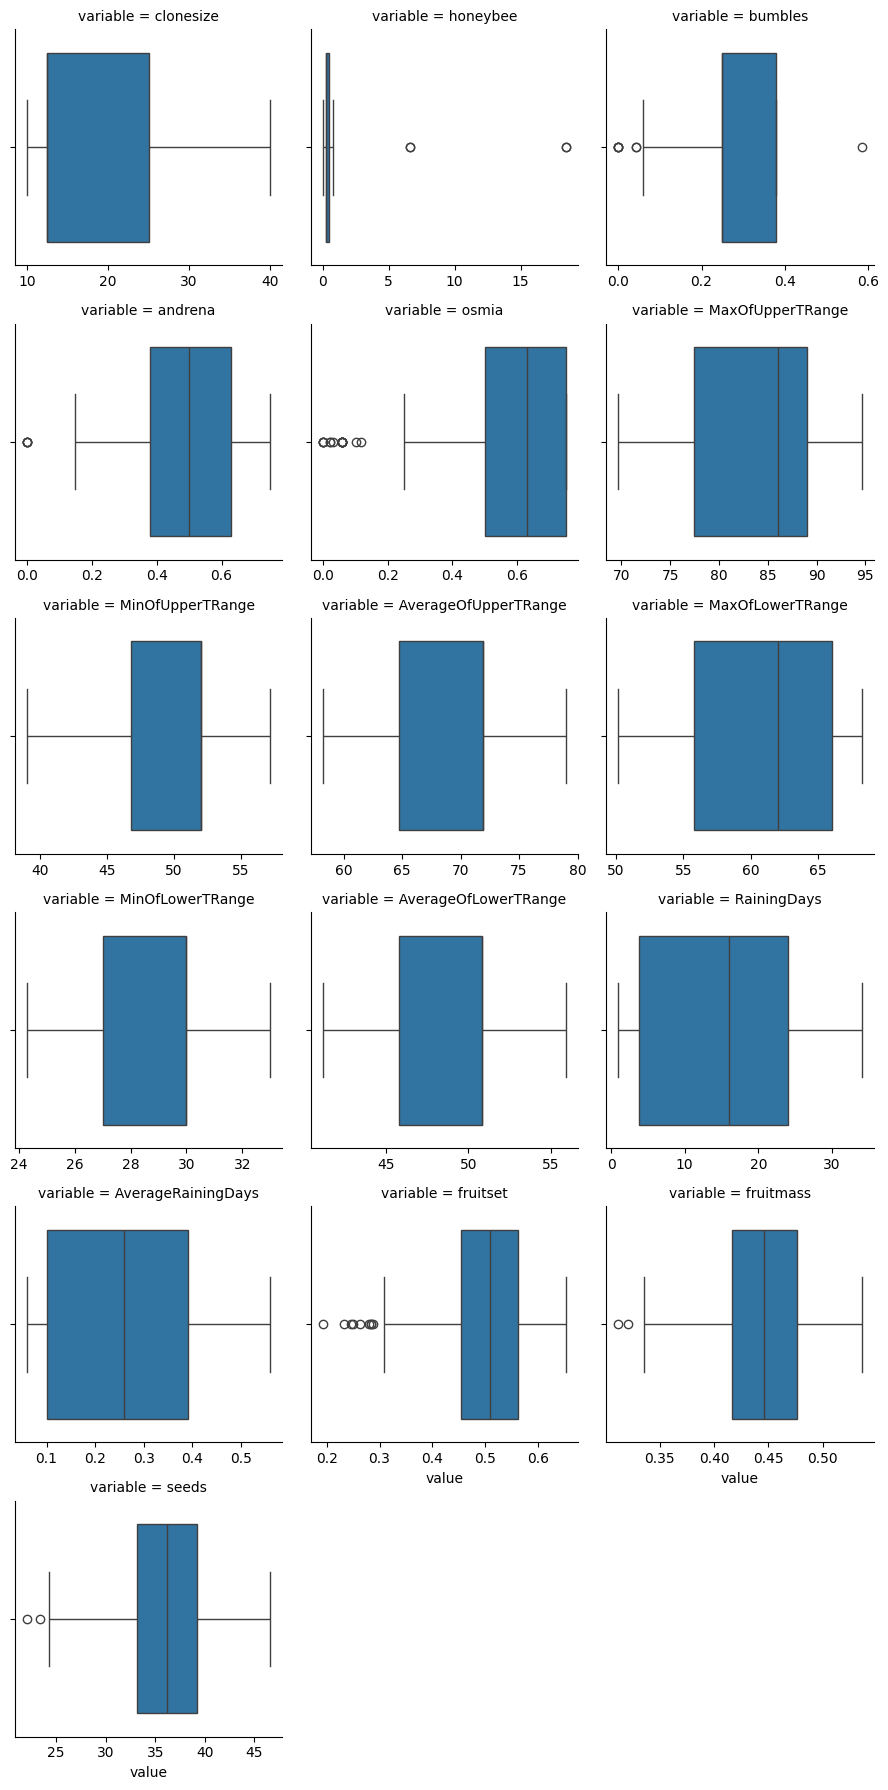

In [ ]:
drawBox = pd.melt(blueberryWild_data, blueberryWild_data.describe().columns[-1], blueberryWild_data.describe().columns[:-1])

box_plot = sns.FacetGrid(drawBox, col="variable", col_wrap=3, sharex=False, sharey=False)
box_plot.map(sns.boxplot, "value")

plt.show()

 Oh! something wrong. I am feeling outliers in my dataset after boxplots.<br>
Let's see, I try to remove outliers with IQR technique.

<font color='gree'><strong>What is IQR?</font> <br>
***Wikipedia Definition***

The <strong>interquartile range</strong> (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

[modre details](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)

<img src="https://www.isixsigma.com/wp-content/uploads/2018/11/intro-interquartile-range-400x220.png">

<font color="bluelight">Split the data X and y befor the apply IQR method.</font>

In [ ]:
y = blueberryWild_data[['yield']]
X = blueberryWild_data.drop(columns=['yield'])

In [ ]:
X.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898
1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385
2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306
3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586
4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714


In [ ]:
y.head()

,yield
0,3813.165795
1,4947.605663
2,3866.798965
3,4303.943030
4,3436.493543


<font color="bluegray">Now, I applying the IQR method</font>

In [ ]:
q1 = X.quantile(0.25)
q3 = X.quantile(0.75)
iqr = q3 - q1

print(iqr)

clonesize               12.500000
honeybee                 0.250000
bumbles                  0.130000
andrena                  0.250000
osmia                    0.250000
MaxOfUpperTRange        11.600000
MinOfUpperTRange         5.200000
AverageOfUpperTRange     7.200000
MaxOfLowerTRange        10.200000
MinOfLowerTRange         3.000000
AverageOfLowerTRange     5.000000
RainingDays             20.230000
AverageRainingDays       0.290000
fruitset                 0.106571
fruitmass                0.059869
seeds                    6.123577
dtype: float64


In [ ]:
blueberryWild_data.shape

(777, 17)

In [ ]:
after_iqr_data = blueberryWild_data[~((blueberryWild_data < (q1 - 1.5 * iqr)) | (blueberryWild_data> (q3 + 1.5 * iqr))).any(axis=1)]
after_iqr_data.shape

<ipython-input-7-57919e81f00a>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after_iqr_data = blueberryWild_data[~((blueberryWild_data < (q1 - 1.5 * iqr)) | (blueberryWild_data> (q3 + 1.5 * iqr))).any(axis=1)]


(752, 17)

In [ ]:
after_iqr_data = after_iqr_data.reset_index().drop(["index"], axis=1)
after_iqr_data

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,25.0,0.50,0.38,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.558394,0.478666,39.448650,7184.013843
748,25.0,0.50,0.38,0.63,0.50,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.494678,0.429703,34.784888,6292.960756
749,25.0,0.50,0.38,0.63,0.50,69.7,42.1,58.2,50.2,24.3,41.2,1.0,0.10,0.502842,0.430369,35.185971,6374.444297
750,25.0,0.50,0.38,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.513889,0.458966,37.209554,6180.951419


# <font color="grayblue">Again Draw the box plot for check the outliers</font>

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


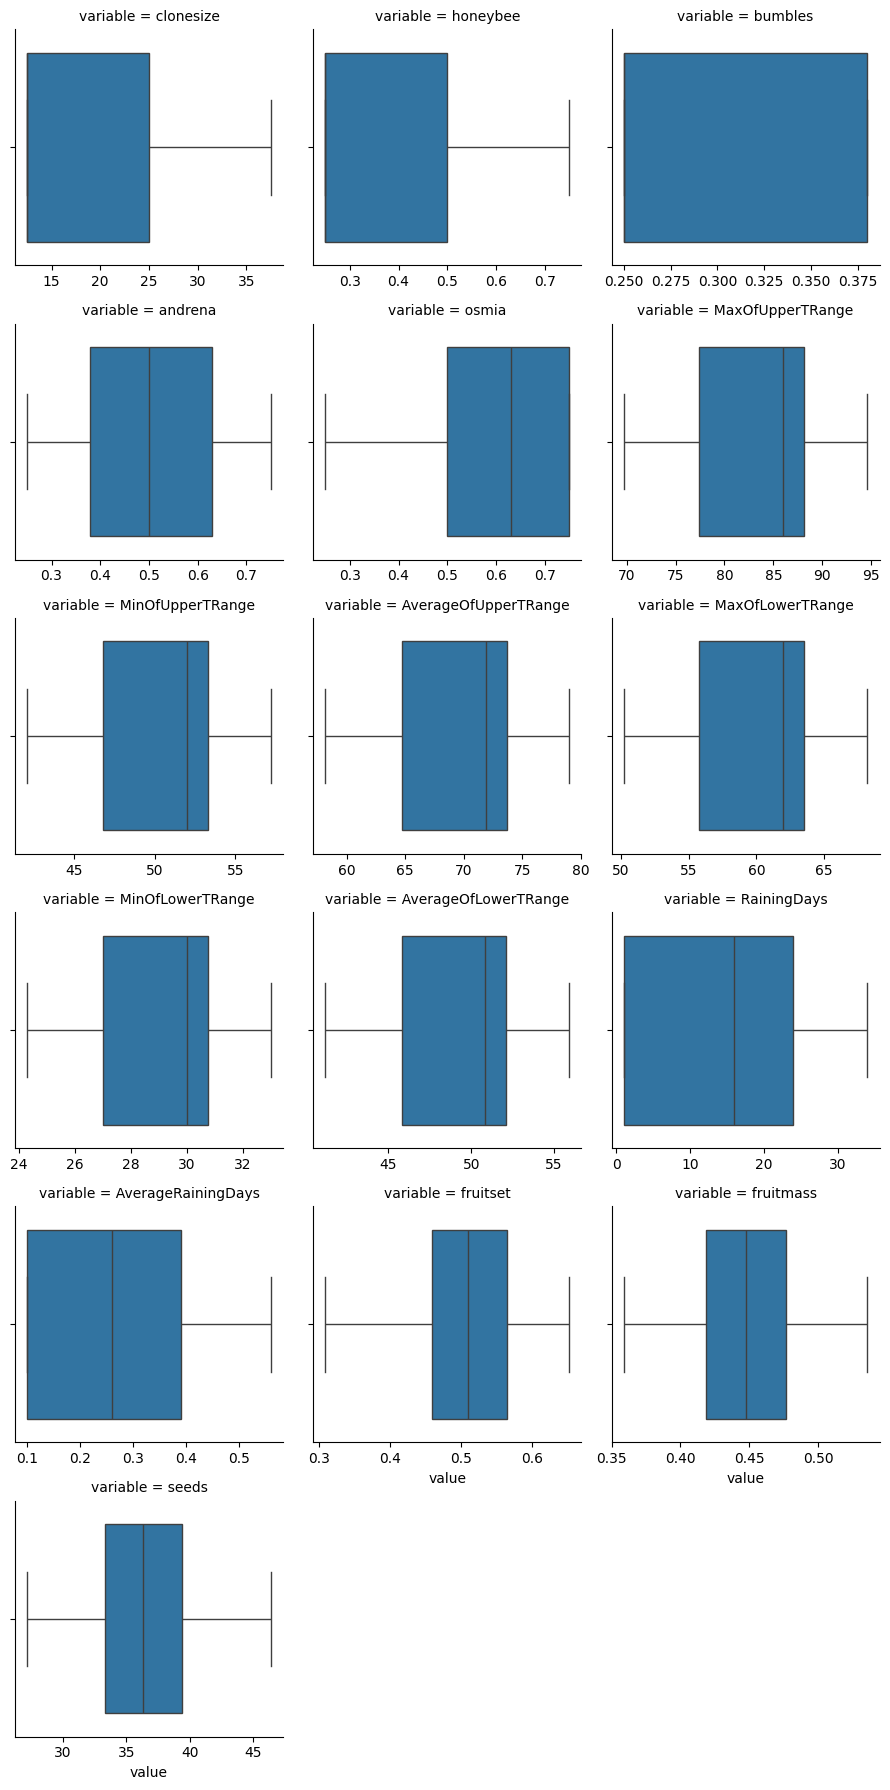

In [ ]:
drawBox = pd.melt(after_iqr_data, after_iqr_data.describe().columns[-1],
                  after_iqr_data.describe().columns[:-1])

box_plot = sns.FacetGrid(drawBox, col="variable", col_wrap=3, sharex=False, sharey=False)
box_plot.map(sns.boxplot, "value")

plt.show()

# <font color="grayblue">*we can see have removed the outliers from dataset*</font>

In [ ]:
wild_bb_data = after_iqr_data

# <font color="greeredblue">Check Highly Correlated Columns with heatmap </font>


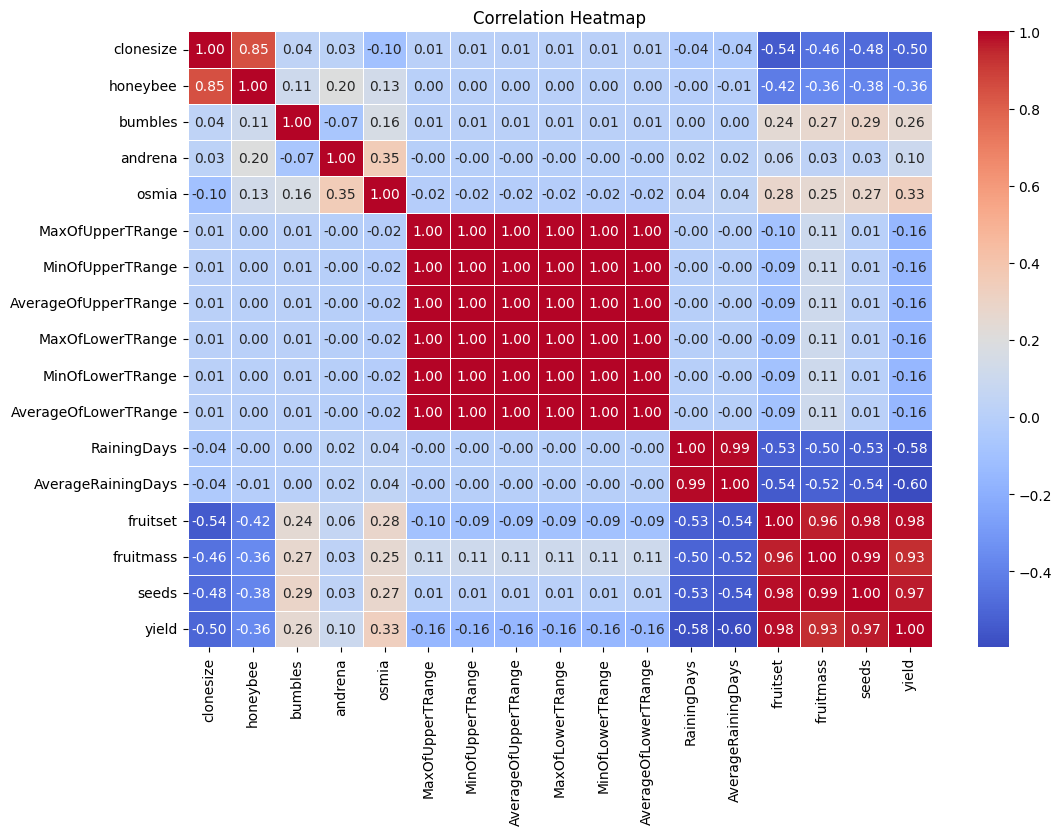

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(wild_bb_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Remove highly correlated columns


In [ ]:
correlation_matrix = wild_bb_data.corr().abs()
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
bb_data = wild_bb_data.drop(columns=to_drop)

# <font color="yellow"><strong>Create heatmap after removing highly correlated columns </font>


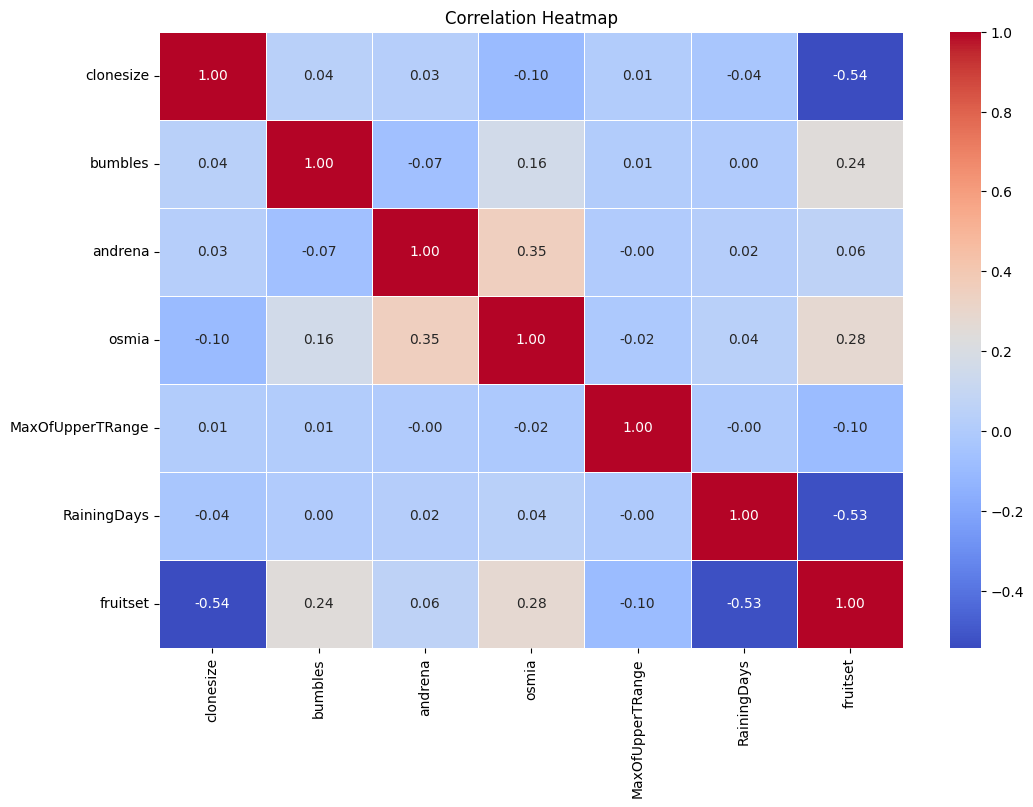

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(bb_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:

#  Save the resulting dataset with the desired columns including 'yield'
# bb_data.to_csv('cleaned_wild_blueberry_dataset.csv', index=False)

# Add the 'yield' column back to the cleaned dataset
data_cleaned_with_yield = bb_data.merge(wild_bb_data[['yield']], left_index=True, right_index=True)

#  Save the cleaned dataset with the 'yield' column
# data_cleaned_with_yield.to_csv('cleaned_wild_blueberry_dataset_with_yield.csv', index=False)

In [ ]:
data_cleaned_with_yield.head(5)

,clonesize,bumbles,andrena,osmia,MaxOfUpperTRange,RainingDays,fruitset,yield
0,37.5,0.25,0.25,0.25,86.0,16.0,0.410652,3813.165795
1,37.5,0.25,0.25,0.25,86.0,1.0,0.444254,4947.605663
2,37.5,0.25,0.25,0.25,94.6,16.0,0.383787,3866.798965
3,37.5,0.25,0.25,0.25,94.6,1.0,0.407564,4303.943030
4,37.5,0.25,0.25,0.25,86.0,24.0,0.354413,3436.493543


#  Split features and target variable after removing highly correlated columns


In [ ]:
X = data_cleaned_with_yield.drop(columns=['yield'])
y = data_cleaned_with_yield['yield']

In [ ]:
# Splitting the Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.head(5)

,clonesize,bumbles,andrena,osmia,MaxOfUpperTRange,RainingDays,fruitset
0,37.5,0.25,0.25,0.25,86.0,16.0,0.410652
1,37.5,0.25,0.25,0.25,86.0,1.0,0.444254
2,37.5,0.25,0.25,0.25,94.6,16.0,0.383787
3,37.5,0.25,0.25,0.25,94.6,1.0,0.407564
4,37.5,0.25,0.25,0.25,86.0,24.0,0.354413


In [ ]:
y

0      3813.165795
1      4947.605663
2      3866.798965
3      4303.943030
4      3436.493543
          ...     
747    7184.013843
748    6292.960756
749    6374.444297
750    6180.951419
751    5700.243243
Name: yield, Length: 752, dtype: float64

#  <font color='bluewight' ><strong>Training with different Model</font>
* Linear Regression
* Randam Forest
* XGBoost
* LightGBM


In [ ]:
#  Training with Linear Regression Model
LR_X_train = X_train
LR_X_test =  X_test
LR_y_train = y_train
LR_y_test = y_test

L_reg_model = LinearRegression()
L_reg_model.fit(LR_X_train, LR_y_train)

LR_y_pred_train = L_reg_model.predict(LR_X_train)
LR_y_pred_test = L_reg_model.predict(LR_X_test)

#  Training with Random Forest Model
RF_X_train = X_train
RF_X_test =  X_test
RF_y_train = y_train
RF_y_test = y_test

rfm = RandomForestRegressor()
rfm.fit(RF_X_train, RF_y_train)

RF_y_pred_train = rfm.predict(RF_X_train)
RF_y_pred_test = rfm.predict(RF_X_test)

#  Training with  XGBoost Model
XG_X_train = X_train
XG_X_test =  X_test
XG_y_train = y_train
XG_y_test = y_test

xgbm = XGBRegressor()
xgbm.fit(XG_X_train, XG_y_train)

XG_y_pred_train = xgbm.predict(XG_X_train)
XG_y_pred_test = xgbm.predict(XG_X_test)

#  Training with  LightGBM Model
LGBM_X_train = X_train
LGBM_X_test =  X_test
LGBM_y_train = y_train
LGBM_y_test = y_test

lgb_train = lgb.Dataset(LGBM_X_train, LGBM_y_train)
lgb_eval = lgb.Dataset(X, y, reference=lgb_train)

lgb_test = lgb.Dataset(LGBM_X_test, LGBM_y_test)


In [ ]:
# Set parameters for LightGBM
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
}

# Train the model
num_boost_round = 100  # Number of boosting rounds
gbm = lgb.train(params, lgb_train, num_boost_round=num_boost_round, valid_sets=[lgb_test])

LGBM_y_pred = gbm.predict(LGBM_X_test, num_iteration=gbm.best_iteration)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001253 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 230
[LightGBM] [Info] Number of data points in the train set: 601, number of used features: 7
[LightGBM] [Info] Start training from score 6033.907555
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

# <font color=bluelight> <strong>Fine Tune Random Forest Model</font>

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#  Hyperparameter Tuning
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],      # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider for the best split
}

# Instantiate the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [ ]:
# Print the best hyperparameters
b_param = grid_search.best_params_

# Get the best model from grid search
best_rf = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf.predict(X_test)


In [ ]:
for key, value in b_param.items():
    print(f" : {key}, Value: {value}")

 : max_depth, Value: None
 : max_features, Value: auto
 : min_samples_leaf, Value: 1
 : min_samples_split, Value: 2
 : n_estimators, Value: 100


In [ ]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100],  # Number of trees
    'max_depth': [None] , # Maximum depth of the trees
    'min_samples_split': [2],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1],      # Minimum number of samples required at each leaf node
    'max_features': ['auto'] , # Number of features to consider for the best split
}

# Instantiate the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None], 'max_features': ['auto'],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [100]},
             scoring='neg_mean_squared_error')

# ***Mean Squared Error***

MSE stands for Mean Squared Error. It is a commonly used metric to evaluate the performance of regression models. MSE calculates the average of the squared differences between the actual and predicted values in a regression problem.
</p>
<img src="https://miro.medium.com/v2/resize:fit:1222/1*m147bKzSgHG4afwzi1YKnQ.png" width="350" height="200">

# <font color = 'goldblue'> <strong> Model Evaluation

In [ ]:

# Linear Regression Model
LR_mae = mean_absolute_error(LR_y_test, LR_y_pred_test)
LR_mse = mean_squared_error(LR_y_test, LR_y_pred_test)
LR_rmse = np.sqrt(LR_mse)
LR_r2 = r2_score(LR_y_test, LR_y_pred_test)

# Random Forest Model
RF_mae = mean_absolute_error(RF_y_test, RF_y_pred_test)
RF_mse = mean_squared_error(RF_y_test, RF_y_pred_test)
RF_rmse = np.sqrt(RF_mse)
RF_r2 = r2_score(RF_y_test, RF_y_pred_test)

# Fine Tune Result Random Forest Model
FineT_RF_mae = mean_absolute_error(y_test, y_pred)
FineT_RF_mse = mean_squared_error(y_test, y_pred)
FineT_RF_rmse = np.sqrt(FineT_RF_mse)
FineT_RF_r2 = r2_score(y_test, y_pred)

# XGBoost Model
XG_mae = mean_absolute_error(XG_y_test, XG_y_pred_test)
XG_mse = mean_squared_error(XG_y_test, XG_y_pred_test)
XG_rmse = np.sqrt(XG_mse)
XG_r2 = r2_score(XG_y_test, XG_y_pred_test)

# LightGBM Model
LGBM_mae = mean_absolute_error(LGBM_y_test, LGBM_y_pred)
LGBM_mse = mean_squared_error(LGBM_y_test, LGBM_y_pred)
LGBM_rmse = np.sqrt(LGBM_mse)
LGBM_r2 = r2_score(LGBM_y_test, LGBM_y_pred)


# ***R Squared***
<br><font color=bluelight>The coefficient of determination, commonly denoted as "R-squared",is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables in a regression model. In other words, "R-squared" indicates the goodness of fit of the regression model.<br>
<img src="https://miro.medium.com/v2/resize:fit:1400/1*_HbrAW-tMRBli6ASD5Bttw.png" width="600" height="200"><br>
<img src="https://www.datasciencecentral.com/wp-content/uploads/2021/10/2742052271.jpg" width="600" height="400">

In [ ]:
E_data = {
    'Model': ['LR', 'RF', 'XGBoost', 'LightGBM', 'FineT_RF_M'],
    'MAE': [LR_mae, RF_mae, XG_mae, LGBM_mae, FineT_RF_mae],
    'MSE': [LR_mse, LR_rmse, XG_mse, LGBM_mse, FineT_RF_mse],
    'RMSE': [LR_rmse,RF_rmse, XG_rmse, LGBM_rmse, FineT_RF_rmse],
    'R2': [LR_r2,RF_r2, XG_r2, LGBM_r2, FineT_RF_r2]
}

e_df = pd.DataFrame(E_data)
print(e_df)

        Model         MAE           MSE        RMSE        R2
0          LR  103.624300  17447.267895  132.088107  0.989196
1          RF  108.933284    132.088107  137.253463  0.988335
2     XGBoost  110.504404  20005.904954  141.442232  0.987612
3    LightGBM   99.350136  15535.971459  124.643377  0.990380
4  FineT_RF_M  107.740094  18747.017803  136.919749  0.988392


# <font color="bluelight">Cross-Validation</font>

In [ ]:

# LR cross-validation
lr_cv_scores = cross_val_score(L_reg_model, X, y, cv=3)
ln_mean_CV = np.mean(lr_cv_scores)

# RF cross-validation
rf_cv_scores = cross_val_score(rfm, X, y, cv=3)
rf_mean_CV = np.mean(rf_cv_scores)

# XGBoost cross-validation
xg_cv_scores = cross_val_score(xgbm, X, y, cv=3)
xg_mean_CV = np.mean(xg_cv_scores)

# Fine Tune Random Forest Model cross-validation
ftrfm_cv_scores = cross_val_score(grid_search, X, y, cv=3)
ftrfm_mean_CV = np.mean(xg_cv_scores)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

## <font color=greenyellow>CROSS-VALIDATION RESULT</font>

In [ ]:
# LR cross-validation
print("LR Cross-Validation Scores:", lr_cv_scores)
print("LR Mean CV Score:", ln_mean_CV)
# RF cross-validation
print("RF Cross-Validation Scores:", rf_cv_scores)
print("RF Mean CV Score:", rf_mean_CV)
# Fine Tune Random Forest Model cross-validation
print("FTRF Cross-Validation Scores:", ftrfm_cv_scores)
print("FTRF Mean CV Score:", ftrfm_mean_CV)
# XGBoost cross-validation
print("XG Cross-Validation Scores:", xg_cv_scores)
print("XG Mean CV Score:", xg_mean_CV)


LR Cross-Validation Scores: [0.98566268 0.98423701 0.97224381]
LR Mean CV Score: 0.9807145003385932
RF Cross-Validation Scores: [0.9759411  0.98435106 0.94233391]
RF Mean CV Score: 0.9675420234633437
FTRF Cross-Validation Scores: [-46998.83181072 -25120.88136226 -58740.65247051]
FTRF Mean CV Score: 0.968690053376521
XG Cross-Validation Scores: [0.97654822 0.97766988 0.95185206]
XG Mean CV Score: 0.968690053376521


# <font color = yellow> <strong>Predicted Yield Result </font>

In [ ]:

LR_pred_data = {'LR Yield': LR_y_pred_test}
RF_pred_data = {'RF Yield': RF_y_pred_test}
XG_pred_data = {'XGBoost Yield': XG_y_pred_test}
LGBM_pred_data = {'LightGBM Yield': LGBM_y_pred}
FTRFM_pred_data = {'FineT_RF Yield': y_pred}

# Concatenating DataFrames horizontally
pred_df = pd.concat([ pd.DataFrame(LR_pred_data),
                     pd.DataFrame(RF_pred_data),
                     pd.DataFrame(XG_pred_data),
                     pd.DataFrame(LGBM_pred_data),
                     pd.DataFrame(FTRFM_pred_data)
                     ], axis=1)

# Display the DataFrame
print(pred_df)


        LR Yield     RF Yield  XGBoost Yield  LightGBM Yield  FineT_RF Yield
0    4370.146943  4272.285533    4257.017578     4309.155960     4265.285425
1    5560.726713  5511.491262    5581.933594     5498.558963     5507.542646
2    5385.973655  5149.129056    5247.522461     5215.717581     5121.730056
3    7597.724759  7619.407095    7649.535156     7569.600076     7610.113308
4    7159.337193  7321.948001    7299.232422     7300.815018     7240.270879
..           ...          ...            ...             ...             ...
146  5407.114737  5376.216462    5411.339844     5376.910011     5372.657287
147  6081.677098  6143.620601    6148.476074     6171.730851     6142.603586
148  4564.542519  4487.654298    4392.958008     4451.867028     4494.186776
149  4456.559009  4292.899086    4393.049805     4411.209986     4290.846444
150  7608.799485  7608.681932    7562.488281     7589.791642     7617.188463

[151 rows x 5 columns]


# <font color = yellow> <strong>Actual Result </font>

In [ ]:
actual_data = y_test

actual_data

584    4572.126366
591    5720.723161
486    5424.123512
77     7660.886044
212    7159.336664
          ...     
331    5305.743635
90     6254.829217
355    4480.070000
497    4460.914573
69     7570.484920
Name: yield, Length: 151, dtype: float64

# <font color = bluelight> <strong>Visualization Different Model Result </font>

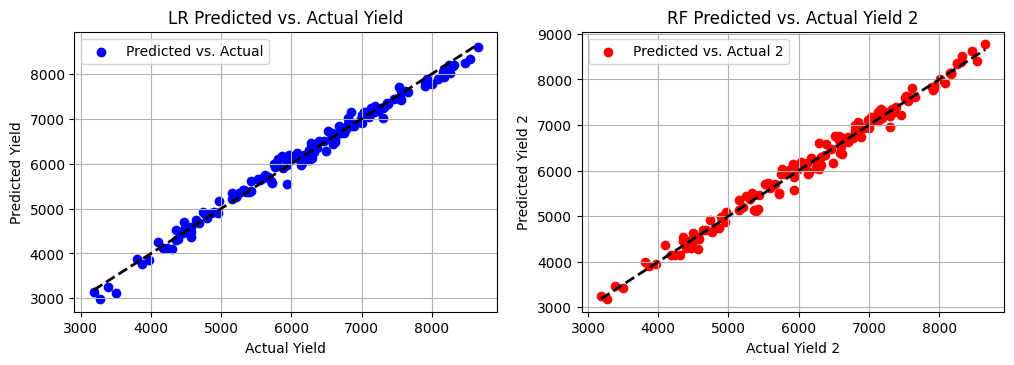

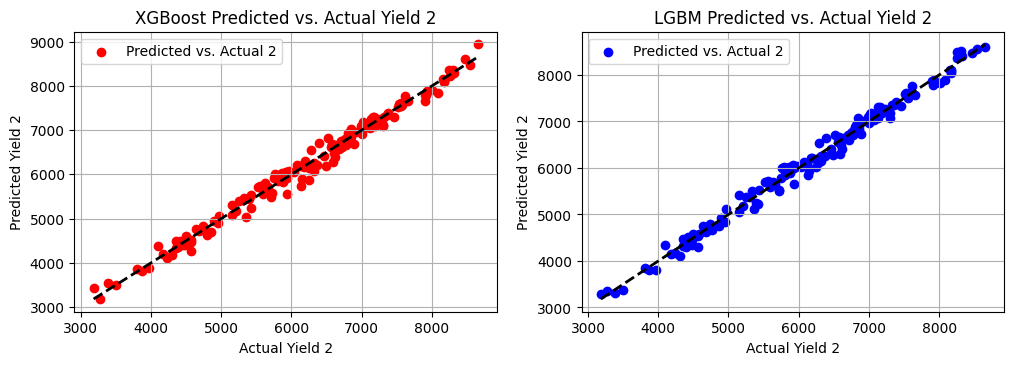

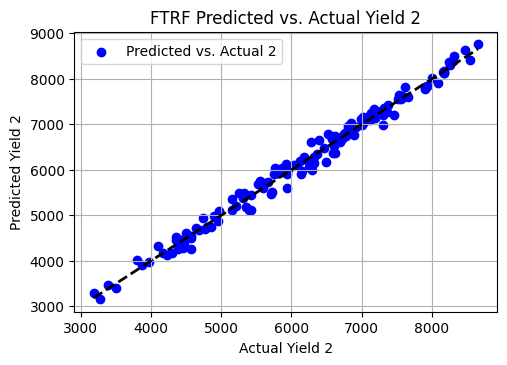

In [ ]:
plt.figure(figsize=(12, 8))

# Scatter plot for the first comparison
plt.subplot(2, 2, 1)
plt.scatter(LR_y_test, LR_y_pred_test, color='blue', label='Predicted vs. Actual')
plt.plot([LR_y_test.min(), LR_y_test.max()], [LR_y_test.min(), LR_y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('LR Predicted vs. Actual Yield')
plt.legend(loc='best')
plt.grid(True)

# Scatter plot for the second comparison
plt.subplot(2, 2, 2)
plt.scatter(RF_y_test, RF_y_pred_test, color='red', label='Predicted vs. Actual 2')
plt.plot([RF_y_test.min(), RF_y_test.max()], [RF_y_test.min(), RF_y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Yield 2')
plt.ylabel('Predicted Yield 2')
plt.title('RF Predicted vs. Actual Yield 2')
plt.legend(loc='best')
plt.grid(True)

plt.figure(figsize=(12, 8))
# Scatter plot for the third comparison
plt.subplot(2, 2, 3)
plt.scatter(XG_y_test, XG_y_pred_test, color='red', label='Predicted vs. Actual 2')
plt.plot([XG_y_test.min(), XG_y_test.max()], [XG_y_test.min(), XG_y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Yield 2')
plt.ylabel('Predicted Yield 2')
plt.title('XGBoost Predicted vs. Actual Yield 2')
plt.legend(loc='best')
plt.grid(True)

# Scatter plot for the fourth comparison
plt.subplot(2, 2, 4)
plt.scatter(LGBM_y_test, LGBM_y_pred, color='blue', label='Predicted vs. Actual 2')
plt.plot([LGBM_y_test.min(), LGBM_y_test.max()], [LGBM_y_test.min(), LGBM_y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Yield 2')
plt.ylabel('Predicted Yield 2')
plt.title('LGBM Predicted vs. Actual Yield 2')
plt.legend(loc='best')
plt.grid(True)

plt.figure(figsize=(12, 8))
# Scatter plot for the fifth comparison
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs. Actual 2')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Yield 2')
plt.ylabel('Predicted Yield 2')
plt.title('FTRF Predicted vs. Actual Yield 2')
plt.legend(loc='best')
plt.grid(True)

In [ ]:
print(e_df)

        Model         MAE           MSE        RMSE        R2
0          LR  103.624300  17447.267895  132.088107  0.989196
1          RF  109.728371    132.088107  137.148089  0.988353
2     XGBoost  110.504404  20005.904954  141.442232  0.987612
3    LightGBM   99.350136  15535.971459  124.643377  0.990380
4  FineT_RF_M  107.740094  18747.017803  136.919749  0.988392


# <strong>Saved the model after training

In [ ]:
# # Saving the trained model
# import pickle

# model_path = "/content/drive/MyDrive/miss_aq/class1/w_xgbm_model.pkl"

# # Save the trained model using pickle
# with open(model_path, 'wb') as f:
#     pickle.dump(rfm, f)
# # xgbm.save_model(model_path)
# print("Model saved successfully at:", model_path)

Model saved successfully at: /content/drive/MyDrive/miss_aq/class1/w_rfm_model.pkl


In [ ]:
# # Load the saved model
# with open(model_path, 'rb') as f:
#     saved_model = pickle.load(f)

# y_pred_test = saved_model.predict(X_test)

# <strong>I applied the different models for the feature. According to my knowledge, the best model is LightGBM.